# **1. Perkenalan Dataset**


**Sumber Dataset**:  https://www.kaggle.com/datasets/uciml/mushroom-classification

Dataset yang dipilih adalah sebuah dataset yang berisi data dari 23 spesies jamur yang berhasil diambil sampelnya dari keluarga spesies Agaricus and Lepiota. Setiap Species nantinya akan diidentifikasi apakah beracun, dapat dimakan, atau belum diketahui dan tidak direkomendasikan. Yang kemudian dikerucutkan klasifikasinya menjadi 2 kelas yaitu edible (e) dan poisonous (p). Jumlah data keseluruhan dari dataset ini adalah sebanyak 8124 baris dan dengan 23 kolom, di mana setiap kolom akan merepresentasikan atribut berbeda dari jamur seperti cap-shape, cap-surface, cap-color, bruises, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, dan habitat.

# **2. Import Library**

In [1]:
# Library Umum Termasuk Visualisasi Data
import pandas as pd # Mengimpor Library Pandas untuk Manipulasi dan Analisis Data
import seaborn as sns # Mengimpor Library Seaborn untuk Visualisasi Data Statistik yang Estetis
import matplotlib.pyplot as plt # Mengimpor Library Matplotlib.pyplot untuk Membuat Plot dan Grafik

# Library Pemrosesan Data Sebelum Dimodelkan
from sklearn.preprocessing import LabelEncoder # Mengimpor Kelas LabelEncoder untuk Mengubah Label Kategori Menjadi Angka Numerik
from sklearn.decomposition import PCA # Mengimpor Kelas PCA (Principal Component Analysis) untuk Reduksi Dimensi
from sklearn.preprocessing import StandardScaler # Mengimpor Kelas StandardScaler untuk Melakukan Standardisasi (Penscaler-an) Fitur
from sklearn.model_selection import train_test_split # Mengimpor Fungsi Train_Test_Split untuk Membagi Data Menjadi Set Pelatihan dan Pengujian

# # Library untuk Mengimpor Model yang Akan Digunakan dalam Training
# from sklearn.ensemble import GradientBoostingClassifier # Mengimpor Model Gradient Boosting Classifier untuk Klasifikasi yang Kuat

# # Library Import Matriks Evaluasi Model
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Mengimpor Metrik Evaluasi Umum: Akurasi, Presisi, Recall, dan F1-Score

# Library Eksternal (Untuk Ignore Semua Warnings)
import warnings # Mengimpor Modul Warnings untuk Mengelola Peringatan
warnings.filterwarnings("ignore") # Mengatur Filter Peringatan Agar Semua Peringatan Diabaikan

# **3. Memuat Dataset**

In [2]:
# Baca File CSV Kemudian Simpan Dalam Dataframe
mushrooms_df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
# Buat Agar Notebook Dapat Menampilkan Semua Kolom Secara Keseluruhan
pd.set_option('display.max_columns', None)
# Tampilkan 5 Baris Awal Isi Dataframe
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


**Penjelasan Tahapan :**
Pada tahap ini, dilakukan proses membaca data dari file CSV yang berisi informasi karakteristik jamur dan label klasifikasinya (apakah jamur tersebut dapat dimakan (edible) atau beracun (poisonous)). File dataset dibaca menggunakan fungsi pd.read_csv() dari library pandas dan disimpan ke dalam sebuah variabel dataframe bernama mushrooms_df.

Agar seluruh kolom pada dataset dapat ditampilkan secara utuh di notebook, dilakukan pengaturan tampilan dengan pd.set_option('display.max_columns', None). Setelah itu, dilakukan penampilan 5 data pertama dengan mushrooms_df.head() untuk mendapatkan gambaran awal struktur dan isi dataset. Setiap baris pada data merepresentasikan satu jenis jamur, sedangkan setiap kolom merupakan fitur atau atribut seperti bentuk tudung (cap-shape), warna insang (gill-color), keberadaan luka (bruises), hingga jenis habitatnya. Untuk penjelasan mengenai label pada setiap kolom akan dijelaskan pada bagian selanjutnya yaitu EDA.

# **4. Exploratory Data Analysis (EDA)**

## **4.1. Data Understanding**

In [3]:
# Melihat Jumlah Baris dan Kolom dari Dataframe
mushrooms_df.shape

(8124, 23)

In [4]:
# Melihat Keseluruhan Kolom yang Ada pada Dataframe
mushrooms_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
# Melihat Info Dataframe
mushrooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# Periksa Jumlah Nul pada Masing-Masing Kolom yang Ada pada Dataframe
mushrooms_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**Penjelasan Tahapan :** Pada tahap awal eksplorasi data, langkah pertama yang dilakukan adalah memahami struktur data yang digunakan. Dataset jamur yang dianalisis terdiri dari 8124 baris dan 23 kolom, di mana setiap kolom merepresentasikan atribut berbeda dari jamur seperti bentuk tudung, warna spora, jenis cincin, dan lain-lain. Informasi ini diperoleh menggunakan fungsi .shape dan .columns.

Selanjutnya, dilakukan pemeriksaan tipe data dan jumlah entri pada setiap kolom menggunakan fungsi .info(). Hasil pemeriksaan menunjukkan bahwa seluruh kolom bertipe object, yang berarti semua fitur bersifat kategorikal. Ini sangat penting untuk dicatat karena akan mempengaruhi teknik preprocessing (**Dilakukan teknik encoding untuk merubah data menjadi data kuantitatif**) yang harus diterapkan sebelum model machine learning dapat dibangun.

Terakhir, dilakukan pengecekan terhadap keberadaan nilai yang hilang (missing values) dengan fungsi .isnull().sum(). Dari hasil analisis, diketahui bahwa tidak terdapat nilai kosong pada keseluruhan dataset. Hal ini menandakan bahwa tidak diperlukan proses imputasi atau penanganan nilai hilang, sehingga data siap untuk diproses lebih lanjut.

## **4.2. Distribution Analysis**

In [7]:
# Melihat Distribusi dari Sisi Statistik
mushrooms_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
# Menampilkan Label Unik yang Ada di Setiap Kolom
for col in mushrooms_df.columns:
    print(f"{col}: {mushrooms_df[col].unique()} \n")

class: ['p' 'e'] 

cap-shape: ['x' 'b' 's' 'f' 'k' 'c'] 

cap-surface: ['s' 'y' 'f' 'g'] 

cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'] 

bruises: ['t' 'f'] 

odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm'] 

gill-attachment: ['f' 'a'] 

gill-spacing: ['c' 'w'] 

gill-size: ['n' 'b'] 

gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o'] 

stalk-shape: ['e' 't'] 

stalk-root: ['e' 'c' 'b' 'r' '?'] 

stalk-surface-above-ring: ['s' 'f' 'k' 'y'] 

stalk-surface-below-ring: ['s' 'f' 'y' 'k'] 

stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y'] 

stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c'] 

veil-type: ['p'] 

veil-color: ['w' 'n' 'o' 'y'] 

ring-number: ['o' 't' 'n'] 

ring-type: ['p' 'e' 'l' 'f' 'n'] 

spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b'] 

population: ['s' 'n' 'a' 'v' 'y' 'c'] 

habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l'] 



**Penjelasan Tahapan:** Pada tahap ini dilakukan analisis terhadap distribusi data pada masing-masing fitur dalam dataset. Analisis distribusi bertujuan untuk memahami keragaman nilai dari setiap fitur, frekuensi kemunculannya, serta mengetahui karakteristik dari fitur-fitur tersebut yang nantinya akan membantu dalam proses preprocessing maupun pemodelan.

Langkah awal dilakukan dengan menggunakan fungsi describe() untuk melihat ringkasan statistik dari setiap fitur, seperti jumlah data (count), jumlah nilai unik (unique), nilai yang paling sering muncul (top), serta frekuensi kemunculan nilai tersebut (freq). Hasil ini menunjukkan bahwa seluruh fitur memiliki nilai kategorikal (bukan numerik), yang perlu diproses lebih lanjut.

Selanjutnya, untuk memahami nilai-nilai unik pada masing-masing kolom, digunakan fungsi unique() untuk menampilkan seluruh label yang ada pada setiap fitur. Informasi ini sangat penting untuk memahami ruang lingkup kategori dari masing-masing fitur. Berikut ini keterangan dan penjelasan terhadap label masing-masing fitur/ kolom :

1. class

    Menunjukkan jenis jamur:
    e = edible (dapat dimakan),
    p = poisonous (beracun)

2. cap-shape

    Bentuk tudung jamur:
    b = bell (berbentuk lonceng),
    c = conical (kerucut),
    x = convex (cembung),
    f = flat (datar),
    k = knobbed (bertonjol),
    s = sunken (cekung)

3. cap-surface

    Tekstur permukaan tudung jamur:
    f = fibrous (berserat),
    g = grooves (beralur),
    y = scaly (bersisik),
    s = smooth (halus)

4. cap-color

    Warna tudung jamur:
    n = brown (coklat),
    b = buff (krem),
    c = cinnamon (kayu manis),
    g = gray (abu-abu),
    r = green (hijau),
    p = pink (merah muda),
    u = purple (ungu),
    e = red (merah),
    w = white (putih),
    y = yellow (kuning)

5. bruises

    Apakah jamur menunjukkan memar saat disentuh:
    t = true (ya),
    f = false (tidak)

6. odor

    Aroma jamur:
    a = almond,
    l = anise (seperti licorice),
    c = creosote (bau kimia/tar),
    y = fishy (amis),
    f = foul (busuk),
    m = musty (apek),
    n = none (tidak berbau),
    p = pungent (tajam),
    s = spicy (pedas)

7. gill-attachment

    Cara bilah jamur (gill) melekat ke batang:
    a = attached,
    d = descending,
    f = free (tidak menyentuh batang),
    n = notched

8. gill-spacing

    Jarak antar bilah:
    c = close (rapat),
    w = crowded (padat),
    d = distant (jarang)

9. gill-size

    Ukuran bilah:
    b = broad (lebar),
    n = narrow (sempit)

10. gill-color

    Warna bilah jamur:
    k = black (hitam),
    n = brown (coklat),
    b = buff (krem),
    h = chocolate,
    g = gray,
    r = green,
    o = orange,
    p = pink,
    u = purple,
    e = red,
    w = white,
    y = yellow

11. stalk-shape

    Bentuk batang jamur:
    e = enlarging (membesar ke bawah),
    t = tapering (mengecil ke bawah)

12. stalk-root

    Bentuk akar batang jamur:
    b = bulbous (menggelembung),
    c = club (seperti gada),
    u = cup,
    e = equal (seragam),
    z = rhizomorphs (akar seperti benang),
    r = rooted (berakar),
    ? = missing (tidak diketahui)

13. stalk-surface-above-ring

    Tekstur batang di atas cincin:
    f = fibrous,
    y = scaly,
    k = silky,
    s = smooth

14. stalk-surface-below-ring

    Tekstur batang di bawah cincin:
    f = fibrous,
    y = scaly,
    k = silky,
    s = smooth

15. stalk-color-above-ring

    Warna batang di atas cincin:
    n = brown,
    b = buff,
    c = cinnamon,
    g = gray,
    o = orange,
    p = pink,
    e = red,
    w = white,
    y = yellow

16. stalk-color-below-ring

    Warna batang di bawah cincin:
    n = brown,
    b = buff,
    c = cinnamon,
    g = gray,
    o = orange,
    p = pink,
    e = red,
    w = white,
    y = yellow

17. veil-type

    Jenis selubung jamur:
    p = partial (sebagian),
    u = universal (menyeluruh)

18. veil-color

    Warna selubung jamur:
    n = brown,
    o = orange,
    w = white,
    y = yellow

19. ring-number

    Jumlah cincin pada batang jamur:
    n = none (tidak ada),
    o = one (satu),
    t = two (dua)

20. ring-type

    Jenis cincin pada batang:
    c = cobwebby,
    e = evanescent,
    f = flaring,
    l = large,
    n = none,
    p = pendant,
    s = sheathing,
    z = zone

21. spore-print-color

    Warna hasil cetakan spora:
    k = black,
    n = brown,
    b = buff,
    h = chocolate,
    r = green,
    o = orange,
    u = purple,
    w = white,
    y = yellow

22. population

    Banyaknya populasi jamur:
    a = abundant (melimpah),
    c = clustered (bergerombol),
    n = numerous (banyak),
    s = scattered (tersebar),
    v = several (beberapa),
    y = solitary (sendiri)

23. habitat

    Habitat tempat jamur tumbuh:
    g = grasses (rumput),
    l = leaves (daun-daunan),
    m = meadows (padang rumput),
    p = paths (jalan setapak),
    u = urban (perkotaan),
    w = waste (tempat sampah/tanah gembur),
    d = woods (hutan)

## **4.3. Data Visualization**

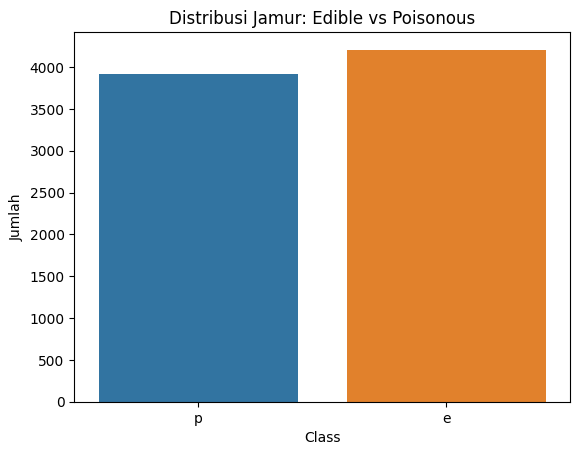

In [9]:
# Menampilkan Visualisasi Distribusi dari Kelas Target (Edible dan Poisonous)
sns.countplot(x='class', data=mushrooms_df) # Membuat Count Plot untuk Menampilkan Jumlah Kemunculan Setiap Kategori di Kolom 'class'
plt.title('Distribusi Jamur: Edible vs Poisonous') # Menetapkan Judul untuk Plot
plt.xlabel('Class') # Menetapkan Label untuk Sumbu X
plt.ylabel('Jumlah') # Menetapkan Label untuk Sumbu Y
plt.show() # Menampilkan Plot

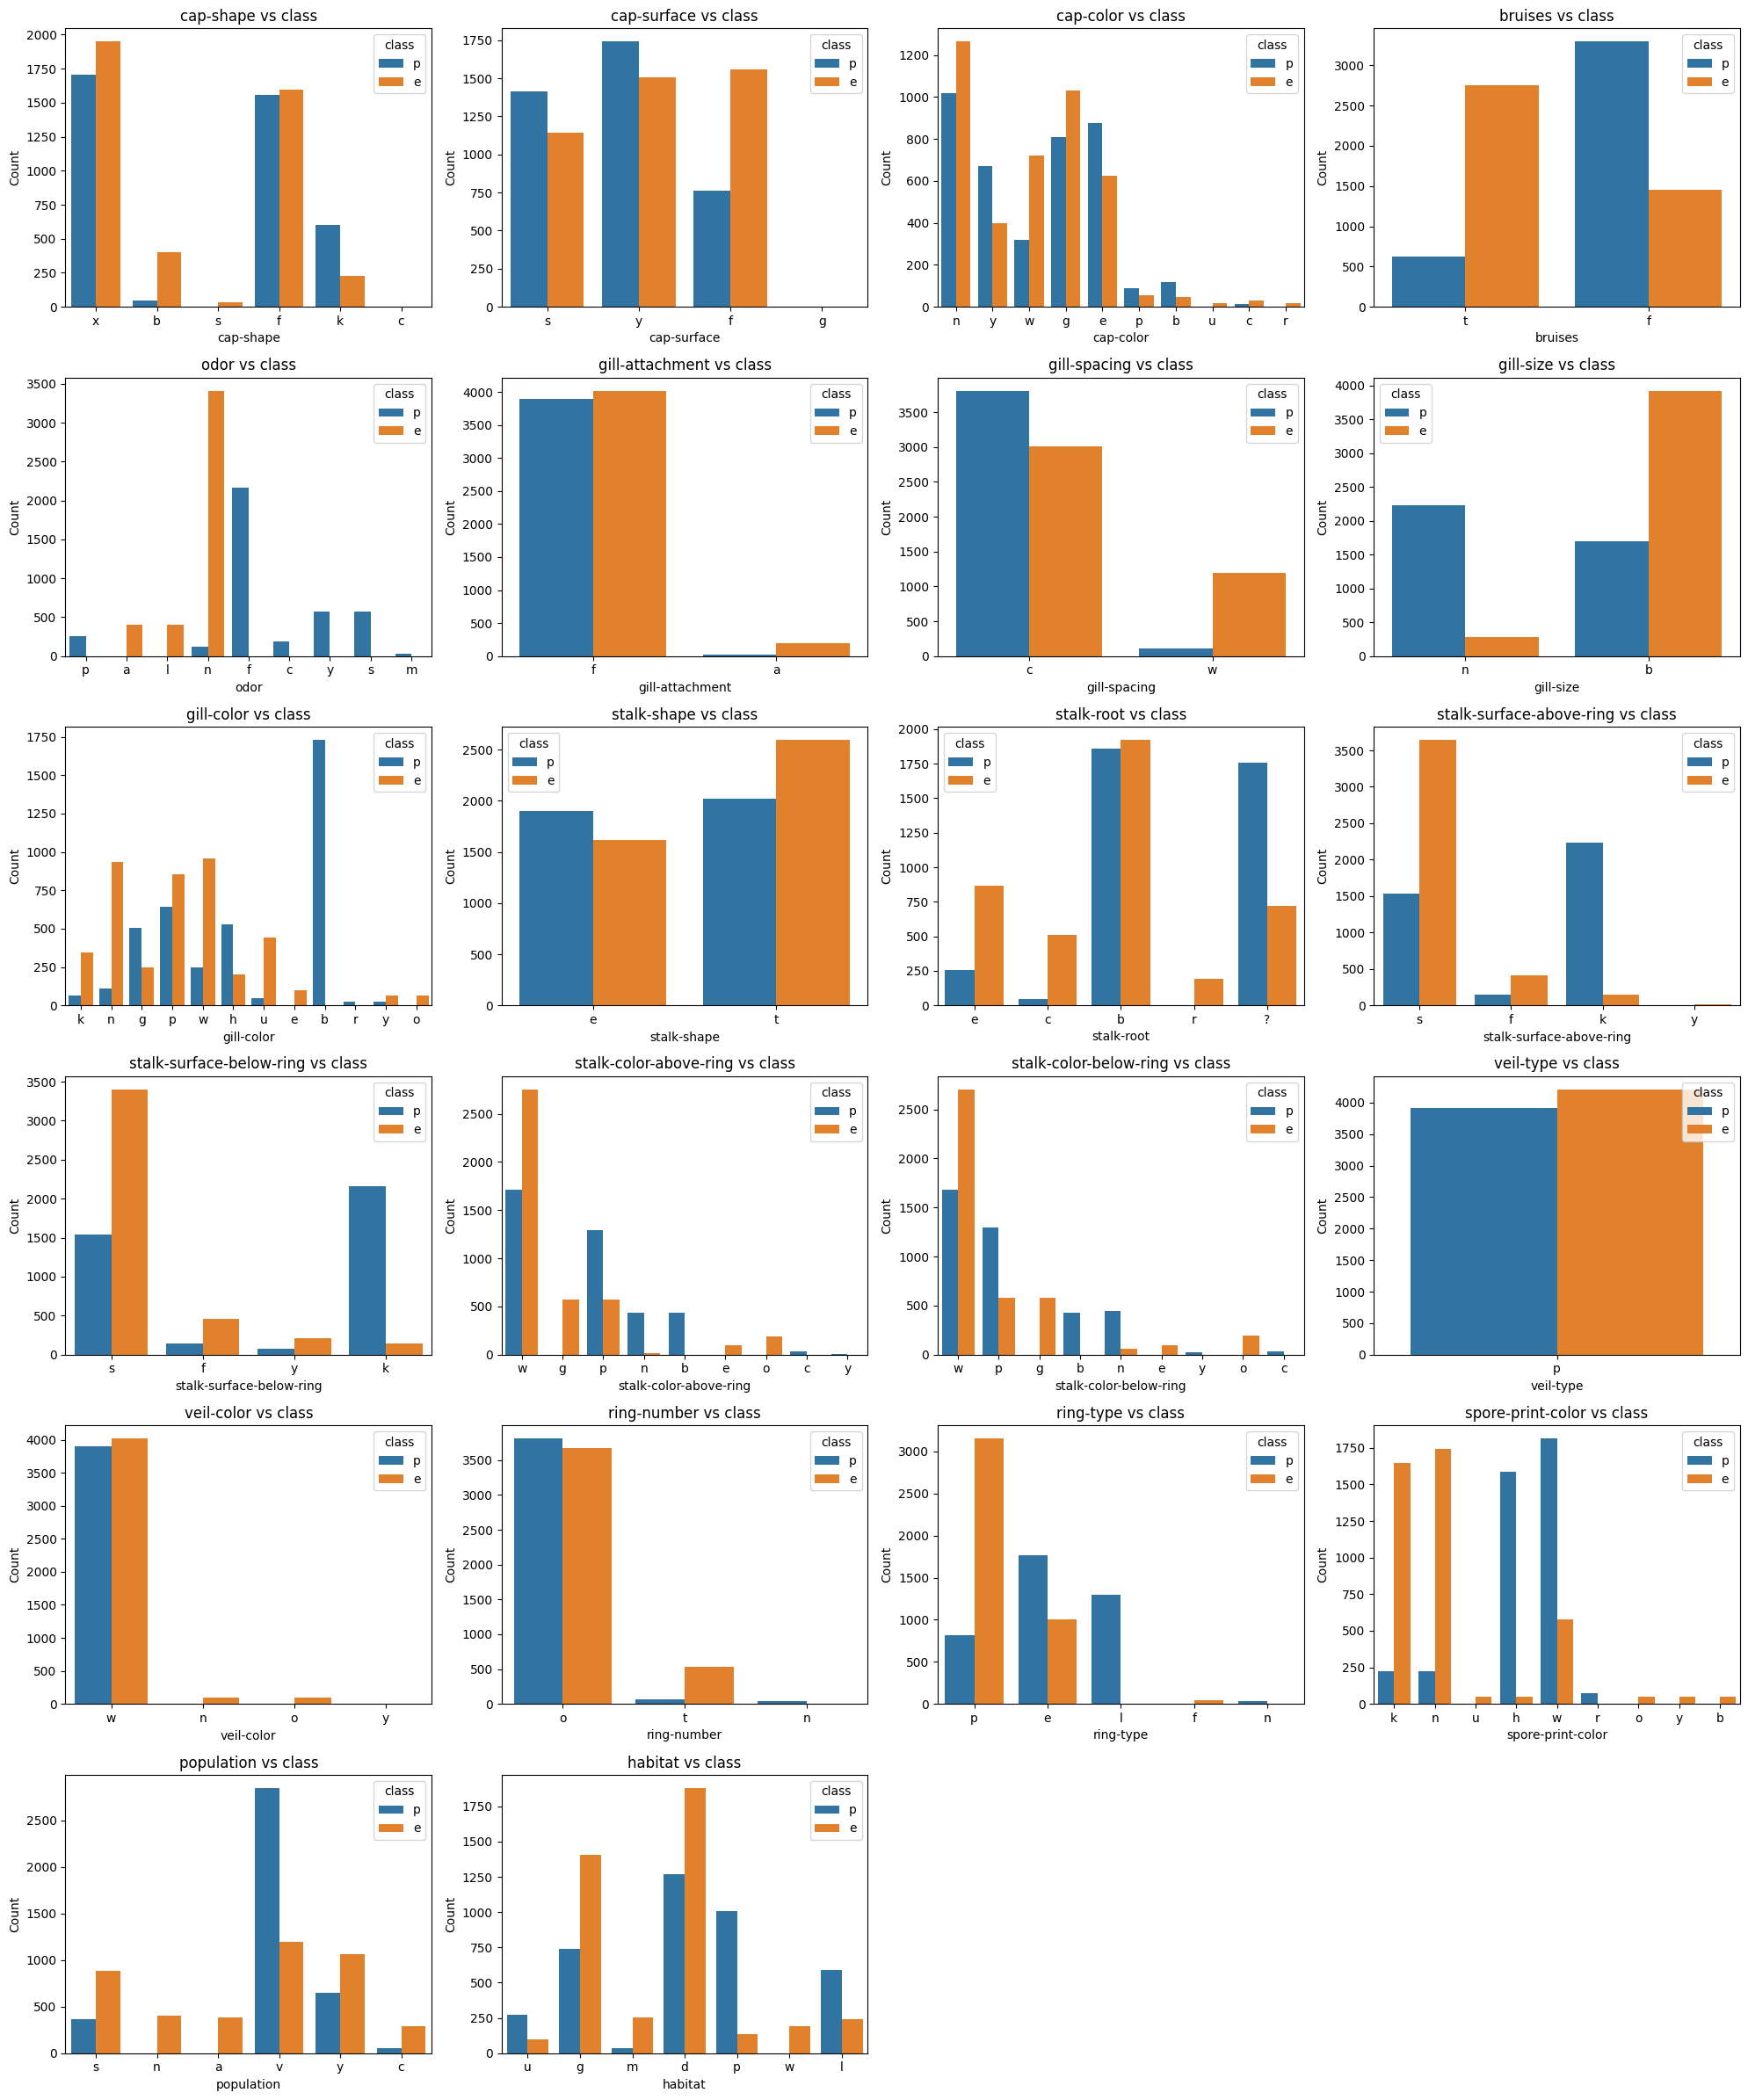

In [10]:
# Menampilkan Distribusi dari Setiap Kolom terhadap Kelas Target (Edible dan Poisonous)
cols = mushrooms_df.columns[1:] # Mengambil Semua Nama Kolom dari DataFrame 'mushrooms_df' Kecuali Kolom Pertama
n_cols = 4 # Menentukan Jumlah Kolom untuk Grid Plot Visualisasi
n_rows = (len(cols) + n_cols - 1) // n_cols # Menghitung Jumlah Baris yang Diperlukan untuk Grid Plot Berdasarkan Jumlah Kolom dan Jumlah Kolom per Baris

plt.figure(figsize=(20, n_rows * 4)) # Membuat Objek Figure untuk Plot dengan Ukuran yang Disesuaikan

for i, col in enumerate(cols): # Melakukan Iterasi Melalui Setiap Kolom yang Dipilih Beserta Indeksnya
    plt.subplot(n_rows, n_cols, i + 1) # Membuat Subplot dalam Grid pada Posisi yang Sesuai
    sns.countplot(x=col, hue='class', data=mushrooms_df) # Membuat Count Plot untuk Menampilkan Distribusi Setiap Kolom Terhadap Kolom 'class'
    plt.title(f'{col} vs class') # Menetapkan Judul untuk Setiap Subplot yang Menunjukkan Nama Kolom dan 'class'
    plt.xlabel(col) # Menetapkan Label Sumbu X dengan Nama Kolom Saat Ini
    plt.ylabel('Count') # Menetapkan Label Sumbu Y dengan 'Count'

plt.tight_layout() # Menyesuaikan Tata Letak Subplot Agar Tidak Tumpang Tindih
plt.show() # Menampilkan Semua Plot yang Telah Dibuat

**Penjelasan Tahapan:** Tahapan visualisasi data dilakukan untuk membantu memahami hubungan antara fitur-fitur dalam dataset dengan target variabel, yaitu jenis jamur yang dapat dimakan (edible) atau beracun (poisonous). Visualisasi ini bertujuan untuk memberikan gambaran awal tentang karakteristik data dan membantu dalam proses di tahap selanjutnya.

a. Visualisasi Distribusi Target
Pertama, ditampilkan grafik batang untuk memperlihatkan distribusi kelas target (class). Hasilnya menunjukkan bahwa data jamur dalam dataset cukup seimbang antara jamur yang dapat dimakan (e) dan jamur yang beracun (p), meskipun jumlah jamur e sedikit lebih banyak. Hal ini penting karena distribusi target yang terlalu timpang dapat memengaruhi performa model klasifikasi.

b. Visualisasi Distribusi Fitur terhadap Target
Selanjutnya, dilakukan visualisasi distribusi masing-masing fitur terhadap kelas target (class). Setiap grafik menggambarkan hubungan antara kategori pada fitur tertentu (misalnya bentuk tudung, warna, bau, dll.) dengan jumlah masing-masing kelas edible dan poisonous. Visualisasi dilakukan menggunakan countplot dalam bentuk grid plot dengan 4 kolom per baris agar lebih ringkas dan efisien dalam menampilkan seluruh 22 fitur kategorikal.

# **5. Data Preprocessing**

**Note Penjelasan:** Sebelum data dapat digunakan untuk membangun model klasifikasi berbasis machine learning, diperlukan **proses konversi semua fitur kategorikal menjadi representasi numerik**. Hal ini penting karena mayoritas algoritma machine learning hanya dapat memproses data numerik. Dataset jamur ini berisi 8124 baris dan 23 fitur, semuanya bertipe kategorikal (tipe object dalam pandas). Oleh karena itu, perlu dilakukan encoding agar seluruh fitur berubah menjadi nilai kuantitatif **sehingga memenuhi kriteria, khususnya pada data dengan minimum 500 sampel dan bersifat kuantitatif**.

## **5.1. Categorical Data Encoding**

In [11]:
# Melakukan Encoding Terhadap Data Kategorikal Menggunakan Label Encoder
label_encoders = {} # Membuat Dictionary Kosong untuk Menyimpan Objek LabelEncoder untuk Setiap Kolom
df_encoded = mushrooms_df.copy() # Membuat Salinan DataFrame Asli untuk Menghindari Modifikasi Data Asli

for col in df_encoded.columns: # Melakukan Iterasi Melalui Setiap Kolom dalam DataFrame yang Akan Di-encode
    le = LabelEncoder() # Menginisialisasi Objek LabelEncoder Baru
    df_encoded[col] = le.fit_transform(df_encoded[col]) # Melatih LabelEncoder pada Kolom Saat Ini dan Mentransformasi Nilai Kategorikal Menjadi Angka Numerik
    label_encoders[col] = le # Menyimpan Objek LabelEncoder yang Telah Dilatih ke dalam Dictionary 'label_encoders' dengan Nama Kolom Sebagai Kunci

In [12]:
# Menampilkan Kembali Dataframe Setelah Dilakukan Encoding
df_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


**Penjelasan Tahapan:** Proses encoding dilakukan menggunakan teknik Label Encoding, di mana setiap nilai unik dalam kolom kategorikal akan diubah menjadi nilai numerik diskrit. Misalnya, jika sebuah fitur memiliki tiga kategori seperti ‘low’, ‘medium’, dan ‘high’, maka akan dikodekan menjadi 0, 1, dan 2.

Berikut adalah proses pengkodean yang dilakukan untuk setiap fitur berdasarkan label awal dan hasil transformasi numeriknya:


1. class

    e = edible → 0,
    p = poisonous → 1

2. cap-shape
   
    b = bell → 0,
    c = conical → 1,
    f = flat → 2,
    k = knobbed → 3,
    s = sunken → 4,
    x = convex → 5

3. cap-surface

    f = fibrous → 0,
    g = grooves → 1,
    s = smooth → 2,
    y = scaly → 3

4. cap-color

    b = buff → 0,
    c = cinnamon → 1,
    e = red → 2,
    g = gray → 3,
    n = brown → 4,
    p = pink → 5,
    r = green → 6,
    u = purple → 7,
    w = white → 8,
    y = yellow → 9

5. bruises

    f = false → 0,
    t = true → 1

6. odor

    a = almond → 0,
    c = creosote → 1,
    f = foul → 2,
    l = anise → 3,
    m = musty → 4,
    n = none → 5,
    p = pungent → 6,
    s = spicy → 7,
    y = fishy → 8

7. gill-attachment

    a = attached → 0,
    f = free → 1

8. gill-spacing

    c = close → 0,
    w = crowded → 1

9. gill-size

    b = broad → 0,
    n = narrow → 1

10. gill-color

    b = buff → 0,
    e = red → 1,
    g = gray → 2,
    h = chocolate → 3,
    k = black → 4,
    n = brown → 5,
    o = orange → 6,
    p = pink → 7,
    r = green → 8,
    u = purple → 9,
    w = white → 10,
    y = yellow → 11

11. stalk-shape

    e = enlarging → 0,
    t = tapering → 1

12. stalk-root

    b = bulbous → 0,
    c = club → 1,
    e = equal → 2,
    r = rooted → 3,
    ? = missing → 4,
    u = cup → 5,
    z = rhizomorphs → 6

13. stalk-surface-above-ring

    f = fibrous → 0,
    k = silky → 1,
    s = smooth → 2,
    y = scaly → 3

14. stalk-surface-below-ring

    f = fibrous → 0,
    k = silky → 1,
    s = smooth → 2,
    y = scaly → 3

15. stalk-color-above-ring

    b = buff → 0,
    c = cinnamon → 1,
    e = red → 2,
    g = gray → 3,
    n = brown → 4,
    o = orange → 5,
    p = pink → 6,
    w = white → 7,
    y = yellow → 8

16. stalk-color-below-ring

    b = buff → 0,
    c = cinnamon → 1,
    e = red → 2,
    g = gray → 3,
    n = brown → 4,
    o = orange → 5,
    p = pink → 6,
    w = white → 7,
    y = yellow → 8,

17. veil-type

    p = partial → 0,
    u = universal → 1

18. veil-color

    n = brown → 0,
    o = orange → 1,
    w = white → 2,
    y = yellow → 3

19. ring-number

    n = none → 0,
    o = one → 1,
    t = two → 2

20. ring-type

    c = cobwebby → 0,
    e = evanescent → 1,
    f = flaring → 2,
    l = large → 3,
    n = none → 4,
    p = pendant → 5,
    s = sheathing → 6,
    z = zone → 7

21. spore-print-color

    b = buff → 0,
    h = chocolate → 1,
    k = black → 2,
    n = brown → 3,
    o = orange → 4,
    r = green → 5,
    u = purple → 6,
    w = white → 7,
    y = yellow → 8

22. population

    a = abundant → 0,
    c = clustered → 1,
    n = numerous → 2,
    s = scattered → 3,
    v = several → 4,
    y = solitary → 5

23. habitat

    d = woods → 0,
    g = grasses → 1,
    l = leaves → 2,
    m = meadows → 3,
    p = paths → 4,
    u = urban → 5,
    w = waste → 6

## **5.2. Data Splitting**

In [13]:
# Pisahkan Kolom Target dengan Kolom Lainnya pada Dataframe kemudian Simpan ke dalam Variabel x, y
x = df_encoded.drop(columns=['class'])
y = df_encoded['class']

In [14]:
# Periksa Isi dari Variabel X yang Sekarang Berisi Kolom Independen (Bukan Kolom Target)
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


**Penjelasan Tahapan:** Pada tahapan ini, proses pemisahan data dilakukan untuk memisahkan kolom target dari seluruh fitur lainnya. Dalam konteks proyek klasifikasi jamur ini, kolom class berfungsi sebagai label atau target prediksi yang ingin kita ketahui, yaitu apakah jamur bersifat edible (dapat dimakan) atau poisonous (beracun). Oleh karena itu, kolom class dipisahkan dan disimpan dalam variabel y, sedangkan kolom-kolom lainnya yang menjadi fitur prediktor disimpan dalam variabel x.

Langkah ini penting dilakukan sebagai tahap awal sebelum membagi dataset menjadi data latih (training set) dan data uji (test set) pada proses pelatihan model machine learning. Dengan memisahkan target dan fitur, kita dapat melatih model untuk mempelajari hubungan antar variabel input (x) terhadap output yang ingin diprediksi (y). Setelah pemisahan dilakukan, dilakukan pula pengecekan awal terhadap isi x untuk memastikan bahwa variabel tersebut tidak lagi mengandung kolom target.

## **5.3. Split Data to Train Set and Test Set**

In [15]:
# Split Data Menjadi Training dan Test Set
x_train, x_test, y_train, y_test = train_test_split( # Membagi Data Menjadi Set Pelatihan (x_train, y_train) dan Set Pengujian (x_test, y_test)
    x, y, test_size=0.2, random_state=42 # Menggunakan x Sebagai Fitur, y Sebagai Target, 20% Data untuk Pengujian, dan Random State untuk Menjaga Konsistensi
)

In [16]:
# Periksa Data pada x_train
x_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,3,2,2,0,7,1,0,1,0,1,0,2,1,6,7,0,2,1,0,7,4,0
6515,5,2,4,0,2,1,0,1,0,1,0,1,2,7,7,0,2,1,0,7,4,4
6141,2,3,2,0,8,1,0,1,0,1,0,2,2,6,7,0,2,1,0,7,4,2
2764,2,0,4,1,5,1,0,0,9,1,1,2,2,3,6,0,2,1,4,3,4,0
438,0,3,9,1,3,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,5,3,4,0,2,1,0,1,0,1,0,1,2,6,7,0,2,1,0,7,4,4
5390,3,3,2,1,5,1,0,0,10,0,0,2,2,7,2,0,2,2,0,7,1,6
860,2,3,4,1,3,1,0,0,10,0,4,2,3,7,7,0,2,1,4,3,5,4
7603,3,2,2,0,2,1,0,1,0,1,0,2,2,6,6,0,2,1,0,7,4,4


**Penjelasan Tahapan:** Setelah data selesai diproses dan siap digunakan, langkah selanjutnya adalah membagi dataset menjadi dua bagian utama, yaitu training set dan test set. Proses ini dilakukan menggunakan fungsi train_test_split() dari pustaka sklearn, dengan proporsi 80% data untuk pelatihan dan 20% data untuk pengujian. Tujuan dari pembagian ini adalah agar model dapat dilatih pada sebagian data, lalu diuji pada data lain yang belum pernah dilihat sebelumnya, sehingga performa generalisasi model dapat diukur secara objektif.

Data yang digunakan untuk pembagian terdiri dari fitur (x) dan label target (y). Parameter random_state=42 ditetapkan untuk menjaga konsistensi hasil pembagian saat kode dijalankan ulang. Dengan pemisahan ini, diharapkan model dapat belajar secara optimal dari data pelatihan dan memberikan evaluasi yang adil pada data pengujian.

In [17]:
# Simpan masing-masing ke file CSV
x_train.to_csv("X_train.csv", index=False)
x_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Semua file CSV berhasil disimpan: x_train.csv, x_test.csv, y_train.csv, y_test.csv")

Semua file CSV berhasil disimpan: x_train.csv, x_test.csv, y_train.csv, y_test.csv
